# Customer Analysis Case Study

## Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, minmax_scale, OneHotEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [190]:
df = pd.read_csv("../data/customer_analayiss_case_study_with_response.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10910 non-null  int64  
 1   state                      10279 non-null  object 
 2   customer lifetime value    10910 non-null  float64
 3   education                  10910 non-null  object 
 4   gender                     10910 non-null  object 
 5   income                     10910 non-null  int64  
 6   monthly premium auto       10910 non-null  int64  
 7   number of open complaints  10277 non-null  float64
 8   policy type                10910 non-null  object 
 9   total claim amount         10910 non-null  float64
 10  vehicle class              10288 non-null  object 
 11  sales channel              10910 non-null  object 
 12  response                   10279 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usag

In [191]:
df.describe()

,Unnamed: 0,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,0.384256,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,0.912457,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,0.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,0.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,0.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,5.000000,2893.239678


## Data Cleaning

In [192]:
def lower_case_column_names(df):
    df.columns = [i.lower() for i in df.columns]
    return df
lower_case_column_names(df)

,unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [193]:
def delete_column(df):
    df = df.drop(columns=["unnamed: 0"], inplace=True)
    return df

delete_column(df)

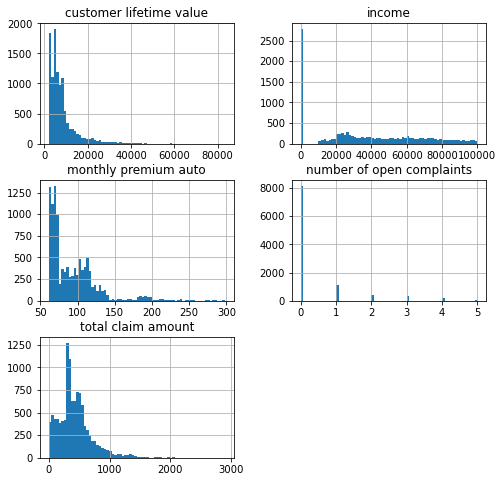

In [194]:
df.hist(bins=70,figsize=(8,8))
plt.show()

In [195]:
round((df == 0).sum()/len(df),2)*100

state                         0.0
customer lifetime value       0.0
education                     0.0
gender                        0.0
income                       26.0
monthly premium auto          0.0
number of open complaints    75.0
policy type                   0.0
total claim amount            0.0
vehicle class                 0.0
sales channel                 0.0
response                      0.0
dtype: float64

In [196]:
# Income (no empty data, so fill in the 0 values with the mean)
mean_income = np.mean(df['income'])
df['income'] = df['income'].replace(0,df['income'].mean())

In [197]:
df['number of open complaints'].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [198]:
# Replace the 0 and na values in # of open complaints

mean_open_complaints = np.mean(df['number of open complaints'])
df['number of open complaints'] = df['number of open complaints'].replace(0,df['number of open complaints'].mean())

mean_open_complaints = np.mean(df['number of open complaints'])
df['number of open complaints'] = df['number of open complaints'].fillna(mean_open_complaints)

In [199]:
state_regions = ['West Region', 'North West', 'East', 'Central']

def states_binned(state):
    if state == "California":
        return "West Region"
    elif state == "Oregon":
        return "North West"
    elif state == "Washington":
        return "East"
    elif state == "NaN":
        return "Unknown"
    else: return "Central"

states_binned

<function __main__.states_binned(state)>

In [200]:
# Add new column

df["state_binned"] = list(map(states_binned,df["state"]))

df.head(5)

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response,state_binned
0,Arizona,4809.216960,College,M,48029.000000,61,0.384256,Corporate Auto,292.800000,Four-Door Car,Agent,No,Central
1,California,2228.525238,College,F,37536.284785,64,0.384256,Personal Auto,744.924331,Four-Door Car,Call Center,No,West Region
2,Washington,14947.917300,Bachelor,M,22139.000000,100,0.384256,Personal Auto,480.000000,SUV,Call Center,No,East
3,Oregon,22332.439460,College,M,49078.000000,97,0.384256,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,North West
4,Oregon,9025.067525,Bachelor,F,23675.000000,117,0.689358,Personal Auto,707.925645,Four-Door Car,Branch,No,North West


In [201]:
# Delete column "state"

df.drop(columns=['state'])

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response,state_binned
0,4809.216960,College,M,48029.000000,61,0.384256,Corporate Auto,292.800000,Four-Door Car,Agent,No,Central
1,2228.525238,College,F,37536.284785,64,0.384256,Personal Auto,744.924331,Four-Door Car,Call Center,No,West Region
2,14947.917300,Bachelor,M,22139.000000,100,0.384256,Personal Auto,480.000000,SUV,Call Center,No,East
3,22332.439460,College,M,49078.000000,97,0.384256,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,North West
4,9025.067525,Bachelor,F,23675.000000,117,0.689358,Personal Auto,707.925645,Four-Door Car,Branch,No,North West
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,Bachelor,F,37536.284785,253,0.689358,Personal Auto,1214.400000,Luxury Car,Web,No,Central
10906,5259.444853,College,F,61146.000000,65,0.384256,Personal Auto,273.018929,Four-Door Car,Branch,No,North West
10907,23893.304100,Bachelor,F,39837.000000,201,0.384256,Corporate Auto,381.306996,Luxury SUV,Web,No,Central
10908,11971.977650,College,F,64195.000000,158,4.000000,Personal Auto,618.288849,SUV,Branch,No,West Region


In [202]:
df.isna().sum()

state                        631
customer lifetime value        0
education                      0
gender                         0
income                         0
monthly premium auto           0
number of open complaints      0
policy type                    0
total claim amount             0
vehicle class                622
sales channel                  0
response                     631
state_binned                   0
dtype: int64

In [203]:
round(df.isna().sum()/len(df),4)*100

state                        5.78
customer lifetime value      0.00
education                    0.00
gender                       0.00
income                       0.00
monthly premium auto         0.00
number of open complaints    0.00
policy type                  0.00
total claim amount           0.00
vehicle class                5.70
sales channel                0.00
response                     5.78
state_binned                 0.00
dtype: float64

In [204]:
df["state_binned"].value_counts(dropna=False)

Central        3561
West Region    3552
North West     2909
East            888
Name: state_binned, dtype: int64

In [205]:
df['vehicle class'].value_counts(dropna=False)


Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [206]:
#Replace NaN with the most frequent values

df['vehicle class'] = df['vehicle class'].fillna('Four-Door Car')

In [207]:
df['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [208]:
df['response'] = df['response'].fillna('No')

In [209]:
df['response'].value_counts(dropna=False)

No     9444
Yes    1466
Name: response, dtype: int64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      10279 non-null  object 
 1   customer lifetime value    10910 non-null  float64
 2   education                  10910 non-null  object 
 3   gender                     10910 non-null  object 
 4   income                     10910 non-null  float64
 5   monthly premium auto       10910 non-null  int64  
 6   number of open complaints  10910 non-null  float64
 7   policy type                10910 non-null  object 
 8   total claim amount         10910 non-null  float64
 9   vehicle class              10910 non-null  object 
 10  sales channel              10910 non-null  object 
 11  response                   10910 non-null  object 
 12  state_binned               10910 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [211]:
df.drop_duplicates()

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response,state_binned
0,Arizona,4809.216960,College,M,48029.000000,61,0.384256,Corporate Auto,292.800000,Four-Door Car,Agent,No,Central
1,California,2228.525238,College,F,37536.284785,64,0.384256,Personal Auto,744.924331,Four-Door Car,Call Center,No,West Region
2,Washington,14947.917300,Bachelor,M,22139.000000,100,0.384256,Personal Auto,480.000000,SUV,Call Center,No,East
3,Oregon,22332.439460,College,M,49078.000000,97,0.384256,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,North West
4,Oregon,9025.067525,Bachelor,F,23675.000000,117,0.689358,Personal Auto,707.925645,Four-Door Car,Branch,No,North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,37536.284785,253,0.689358,Personal Auto,1214.400000,Luxury Car,Web,No,Central
10906,Oregon,5259.444853,College,F,61146.000000,65,0.384256,Personal Auto,273.018929,Four-Door Car,Branch,No,North West
10907,Arizona,23893.304100,Bachelor,F,39837.000000,201,0.384256,Corporate Auto,381.306996,Luxury SUV,Web,No,Central
10908,California,11971.977650,College,F,64195.000000,158,4.000000,Personal Auto,618.288849,SUV,Branch,No,West Region


## Plotting

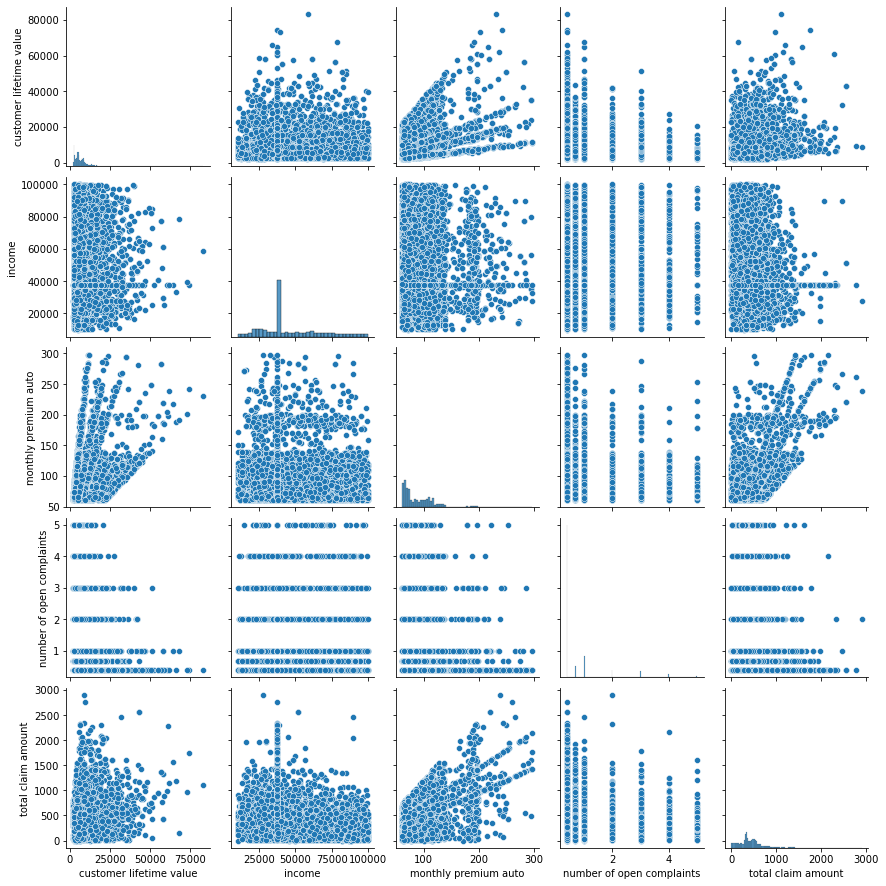

In [212]:
sns.pairplot(df)

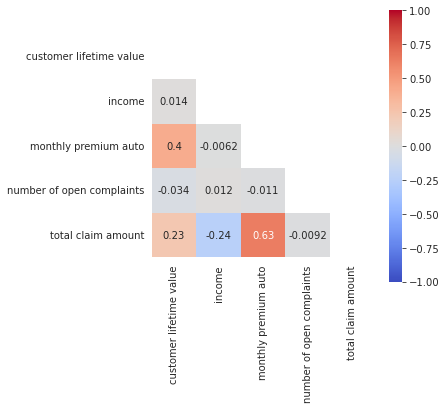

In [213]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [214]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)]

['total claim amount']

In [215]:
numeric_columns=round(df._get_numeric_data(),1)

## Transformers and Scaling

In [216]:
#df.state.value_counts()
#df.education.value_counts()
df.gender.value_counts()
#df['policy type'].value_counts()

F    5573
M    5337
Name: gender, dtype: int64

In [217]:
categoricals_features= df.select_dtypes("object")
categoricals_features

,state,education,gender,policy type,vehicle class,sales channel,response,state_binned
0,Arizona,College,M,Corporate Auto,Four-Door Car,Agent,No,Central
1,California,College,F,Personal Auto,Four-Door Car,Call Center,No,West Region
2,Washington,Bachelor,M,Personal Auto,SUV,Call Center,No,East
3,Oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes,North West
4,Oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No,North West
...,...,...,...,...,...,...,...,...
10905,Nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No,Central
10906,Oregon,College,F,Personal Auto,Four-Door Car,Branch,No,North West
10907,Arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No,Central
10908,California,College,F,Personal Auto,SUV,Branch,No,West Region


In [218]:
categoricals_features

,state,education,gender,policy type,vehicle class,sales channel,response,state_binned
0,Arizona,College,M,Corporate Auto,Four-Door Car,Agent,No,Central
1,California,College,F,Personal Auto,Four-Door Car,Call Center,No,West Region
2,Washington,Bachelor,M,Personal Auto,SUV,Call Center,No,East
3,Oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes,North West
4,Oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No,North West
...,...,...,...,...,...,...,...,...
10905,Nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No,Central
10906,Oregon,College,F,Personal Auto,Four-Door Car,Branch,No,North West
10907,Arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No,Central
10908,California,College,F,Personal Auto,SUV,Branch,No,West Region


In [284]:
categoricals_df = [col for col in df.columns if df[col].dtype=='object']
new_df_categorical=df[categoricals_df]

new_df_categorical

,state,education,gender,policy type,vehicle class,sales channel,response,state_binned
0,Arizona,College,M,Corporate Auto,Four-Door Car,Agent,No,Central
1,California,College,F,Personal Auto,Four-Door Car,Call Center,No,West Region
2,Washington,Bachelor,M,Personal Auto,SUV,Call Center,No,East
3,Oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes,North West
4,Oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No,North West
...,...,...,...,...,...,...,...,...
10905,Nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No,Central
10906,Oregon,College,F,Personal Auto,Four-Door Car,Branch,No,North West
10907,Arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No,Central
10908,California,College,F,Personal Auto,SUV,Branch,No,West Region


In [285]:
categoricals_dummies=pd.get_dummies(new_df_categorical, drop_first=True)
#dfcat = pd.get_dummies(data, columns = categorical_cols)

In [286]:
categoricals_dummies

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,policy type_Personal Auto,...,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,sales channel_Branch,sales channel_Call Center,sales channel_Web,response_Yes,state_binned_East,state_binned_North West,state_binned_West Region
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10906,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
10907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10908,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [221]:
#Option with OneHotEncoder()

#gender_1hot=df[["gender"]]

#cat_encoder = OneHotEncoder()
#gender_1hot= cat_encoder.fit_transform(gender_1hot)
#gender_1hot

In [287]:
#X,Y split

X=df.drop('total claim amount', axis=1)
y=df['total claim amount']

In [289]:
numeric_columns

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,4809.2,48029.0,61,0.4,292.8
1,2228.5,37536.3,64,0.4,744.9
2,14947.9,22139.0,100,0.4,480.0
3,22332.4,49078.0,97,0.4,484.0
4,9025.1,23675.0,117,0.7,707.9
...,...,...,...,...,...
10905,15563.4,37536.3,253,0.7,1214.4
10906,5259.4,61146.0,65,0.4,273.0
10907,23893.3,39837.0,201,0.4,381.3
10908,11972.0,64195.0,158,4.0,618.3


In [291]:
df_new = numeric_columns.join(categoricals_dummies)

In [292]:
df_new.shape

(10910, 28)

In [296]:
X=df_new
X

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,policy type_Personal Auto,policy type_Special Auto,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,sales channel_Branch,sales channel_Call Center,sales channel_Web,response_Yes,state_binned_East,state_binned_North West,state_binned_West Region
0,4809.2,48029.0,61,0.4,292.8,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2228.5,37536.3,64,0.4,744.9,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,14947.9,22139.0,100,0.4,480.0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,22332.4,49078.0,97,0.4,484.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,9025.1,23675.0,117,0.7,707.9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.4,37536.3,253,0.7,1214.4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
10906,5259.4,61146.0,65,0.4,273.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
10907,23893.3,39837.0,201,0.4,381.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
10908,11972.0,64195.0,158,4.0,618.3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [262]:
#X_scaled=StandardScaler().fit_transform(X)
#X_scaled.shape

In [248]:
#X_scaled

array([[-0.46610505,  0.04170751, -0.93481904, -0.39853662],
       [-0.84094593, -0.44242741, -0.84771343, -0.39853662],
       [ 1.00652314, -1.15285966,  0.19755381, -0.39853662],
       ...,
       [ 2.30582467, -0.33627218,  3.13010912, -0.39853662],
       [ 0.5742732 ,  0.78760835,  1.88159547,  4.32450004],
       [-0.16859268, -0.44242741,  0.22658901, -0.39853662]])

In [297]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20)

In [299]:
X_train

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,policy type_Personal Auto,policy type_Special Auto,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,sales channel_Branch,sales channel_Call Center,sales channel_Web,response_Yes,state_binned_East,state_binned_North West,state_binned_West Region
3257,8886.6,87094.0,113,1.0,64.9,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6430,6925.2,88893.0,86,0.4,72.9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2835,8688.8,59098.0,110,0.4,665.9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
6472,5325.4,62470.0,66,0.4,243.8,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9906,6109.1,37536.3,85,0.4,612.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,2903.2,20510.0,74,0.4,355.2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
485,2521.6,53703.0,67,2.0,67.6,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1173,8082.9,53554.0,67,0.4,327.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4370,7799.4,37536.3,105,0.4,504.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [300]:
X_train = sm.add_constant(X_train) # adding a constant


/Users/silvia/opt/miniconda3/envs/DA_Envi/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [319]:
model_ols = sm.OLS(y_train, X_train).fit()

In [320]:
predictions = model_ols.predict(X_train) 

print_model = model_ols.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:     total claim amount   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.985e+11
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:02:40   Log-Likelihood:                          20930.
No. Observations:                8728   AIC:                                 -4.181e+04
Df Residuals:                    8703   BIC:                                 -4.163e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [309]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=42)

In [310]:
X_train.shape

(8728, 28)

In [311]:
model=LinearRegression()    # model
model.fit(X_train, y_train)   # model train

LinearRegression()

In [312]:
model.coef_

array([ 6.17503199e-08,  2.17654294e-08,  2.68739048e-05,  4.09759589e-05,
        1.00000077e+00,  3.06390541e-04,  1.66054040e-03,  2.42059139e-04,
        6.95927837e-04, -5.02170193e-04,  2.52051722e-04,  2.61270771e-04,
       -2.54182429e-04, -1.06161494e-03, -2.05735264e-04, -1.59465281e-03,
       -5.78893204e-03, -4.95851484e-03, -1.14162317e-03, -4.67502158e-04,
        5.38683345e-04, -5.66173733e-04, -6.03674379e-05,  6.69404418e-04,
       -1.03146867e-03,  6.95927837e-04,  2.42059139e-04,  3.06390541e-04])

In [313]:
X_test

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,policy type_Personal Auto,policy type_Special Auto,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,sales channel_Branch,sales channel_Call Center,sales channel_Web,response_Yes,state_binned_East,state_binned_North West,state_binned_West Region
4829,5793.2,95733.0,72,0.4,475.4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5081,2877.4,32807.0,73,0.7,350.4,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5011,2161.7,37536.3,67,2.0,482.4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4625,9217.1,73259.0,115,0.4,673.3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3838,22762.2,70521.0,63,0.4,302.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,3543.2,35695.0,90,0.4,432.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10089,11315.2,11885.0,101,0.4,484.8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8740,16979.8,35095.0,73,0.4,525.6,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0
7831,5534.8,81945.0,68,0.4,47.5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [314]:
y_pred=model.predict(X_test)

In [315]:
y_pred

array([475.40137871, 350.39935731, 482.40015393, ..., 525.59897887,
        47.50113523,  29.9005209 ])

In [316]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 1.0, 'Test Set Residual histogram')

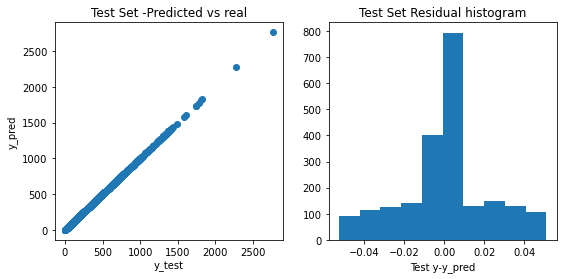

In [317]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")